<a id=top-page></a>
# Generate images for Fig. 2

***

In [62]:
import numpy as np
import pandas as pd
import cmcrameri.cm as cmc
import matplotlib.pyplot as plt
from pykitPIV import Particle, FlowField, Motion, Image, Postprocess

In [5]:
n_images = 2

In [6]:
image_size = (100,100)

In [7]:
size_buffer = 10

In [8]:
figsize = (6,3.5)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [9]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,4),
                     distances=(1,2),
                     densities=(0.2,0.26),
                     signal_to_noise=(5,20),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=100)

In [10]:
image = Image(random_seed=100)

In [11]:
image.add_particles(particles)

Particles added to the image.


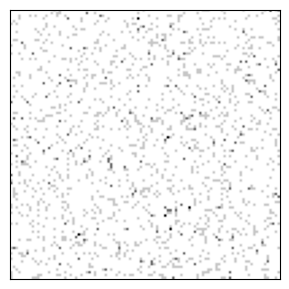

In [12]:
image.plot(0, 
           with_buffer=False,
           cmap='Greys',
           xticks=False,
           yticks=False,
           figsize=figsize, 
           filename='Particle.svg');

In [41]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      random_seed=100)

In [53]:
flowfield.generate_random_velocity_field(gaussian_filters=(2,5),
                                         n_gaussian_filter_iter=10,
                                         displacement=(0,10))

In [54]:
image.add_flowfield(flowfield)

Velocity field added to the image.


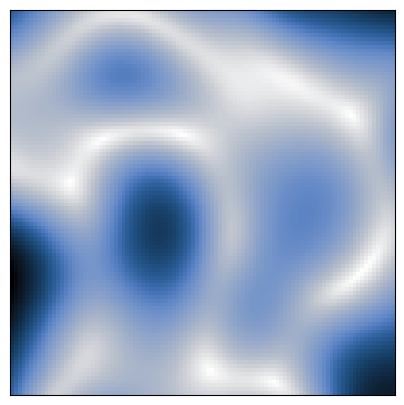

In [55]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    # filename='FlowField.svg');
                                    filename='random-smooth.png');

In [56]:
flowfield.generate_checkered_velocity_field(displacement=(0,10), m=6, n=6)

In [57]:
image.add_flowfield(flowfield)

Velocity field added to the image.


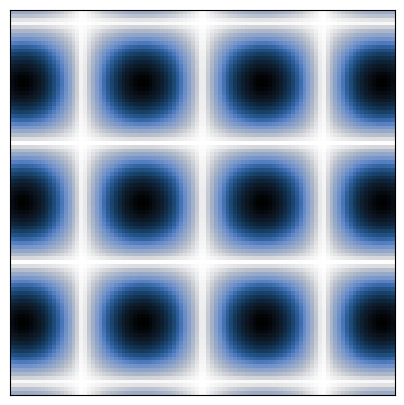

In [58]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    # filename='FlowField.svg');
                                    filename='checkered.png');

In [63]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer)

In [64]:
grid_size = 128
n_modes = 100

In [66]:
u_df = pd.read_csv('../../docs/data/u_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
v_df = pd.read_csv('../../docs/data/v_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
w_df = pd.read_csv('../../docs/data/w_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()

u_tensor = np.reshape(u_df, (grid_size,grid_size,grid_size))
v_tensor = np.reshape(v_df, (grid_size,grid_size,grid_size))
w_tensor = np.reshape(w_df, (grid_size,grid_size,grid_size))

In [67]:
synth_turb_gen_velocity_field = (u_tensor, v_tensor)

In [68]:
flowfield.upload_velocity_field(synth_turb_gen_velocity_field)

In [69]:
image.add_flowfield(flowfield)

Velocity field added to the image.


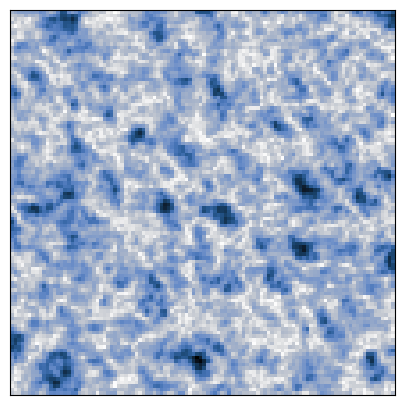

In [71]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    xticks=False,
                                    yticks=False,
                                    cmap=cmc.oslo_r,
                                    cbar=False,
                                    figsize=(5,5),
                                    filename='synthetic-turbulence.png');

***